In [1]:
#@title Section 1: Basic NLP Model { display-mode: "form" }
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 100)
from sklearn.feature_extraction.text import CountVectorizer


nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

PUNCTUATION = '!#$%&()*,-./:;<=>?@^_`{|}~'

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

def plot_word_cloud(text):
  text = text.Sentence.values
  wordcloud = WordCloud(
      width = 3000,
      height = 2000,
      background_color = 'black',
      stopwords = STOPWORDS).generate(str(text))
  fig = plt.figure(
      figsize = (10, 7),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

def preprocess_data(df):
  sentences = df.Sentence.values
  labels = df.Label.values
  tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
  filtered_sentences = [remove_stopwords(' '.join(tokenized_sentence)) for tokenized_sentence in tokenized_sentences]
  return filtered_sentences, labels

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(7,6))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

if 'not' in STOPWORDS:
  STOPWORDS.remove('not')
if 'no' in STOPWORDS:
  STOPWORDS.remove('no')

LABEL_MAP = {0 : "negative", 1 : "neutral", 2 : "positive"}
STOPWORD_SET = set(stopwords.words('english'))
SAMPLE_SENTENCE = 'I need to remove all these meaningless stopwords.'
SAMPLE_SOLUTION = ['need', 'remove', 'meaningless', 'stopwords']

plt.rcParams.update({'font.size': 22})
print ("Train & Test Files are loaded")


[nltk_data] Downloading package punkt to /Users/spol29/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


ModuleNotFoundError: No module named 'gdown'

In [ ]:
df_train = get_finance_train()
print(df_train.head())

                                                                                              Sentence  \
0                                                 Autotank Group is part of Aspo 's Systems Division .   
1  The contract includes design , construction , delivery of equipment , installation and commissio...   
2  Rapala said it estimates it will make savings of 1-2 mln eur a year by centralising its French o...   
3  The share capital of Alma Media Corporation (business ID 1944757-4)is EUR 45,031,513.80 and it i...   
4  The financial impact is estimated to be some 1.5 MEUR annual improvement in the division 's resu...   

   Label  
0      1  
1      1  
2      2  
3      1  
4      2  


In [ ]:
print('There are a total of {} examples in the Finance Train dataset.'.format(df_train.shape[0]))

There are a total of 2037 examples in the Finance Train dataset.


In [ ]:
df_test = get_finance_test()
print(df_test.head())

                                                                                              Sentence  \
0  In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating prof...   
1  Foundries division reports its sales increased by 9.7 % to EUR 63.1 mn from EUR 57.5 mn in the c...   
2                                               Financing of the project will come mainly from China .   
3  Sukhraj Dulai , of the 2900 block of Boni Sue Court , a cul-de-sac on the city 's north side , s...   
4  Finland 's leading metals group Outokumpu said its fourth-quarter net profit more than tripled o...   

   Label  
0      2  
1      2  
2      1  
3      1  
4      2  


In [ ]:
print('There are a total of {} examples in the Finance Test dataset.'.format(df_test.shape[0]))

There are a total of 227 examples in the Finance Test dataset.


In [ ]:
print(LABEL_MAP)

{0: 'negative', 1: 'neutral', 2: 'positive'}


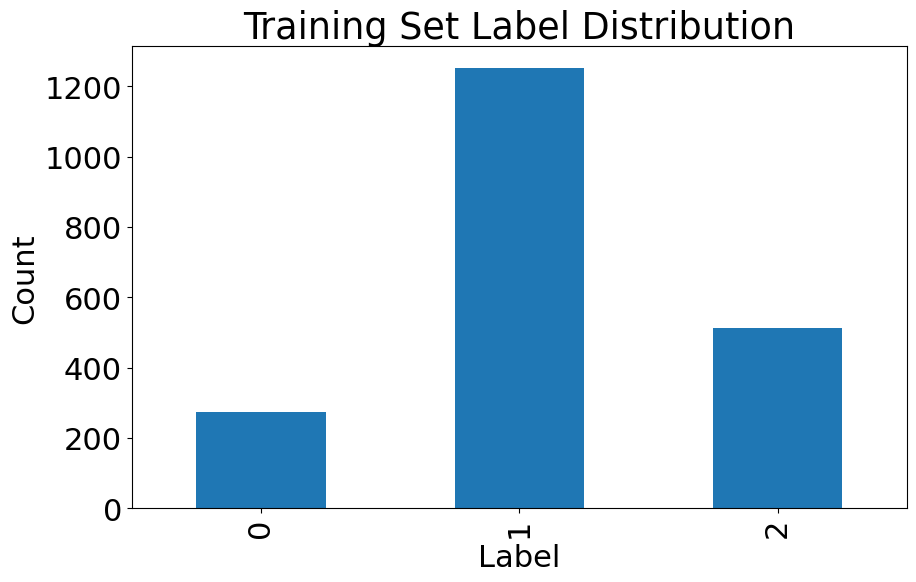

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.title('Training Set Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
df_train.groupby('Label').Sentence.count().plot.bar(ylim=0)
plt.show()

In [ ]:
negative_data = df_train[df_train['Label'] == 0]

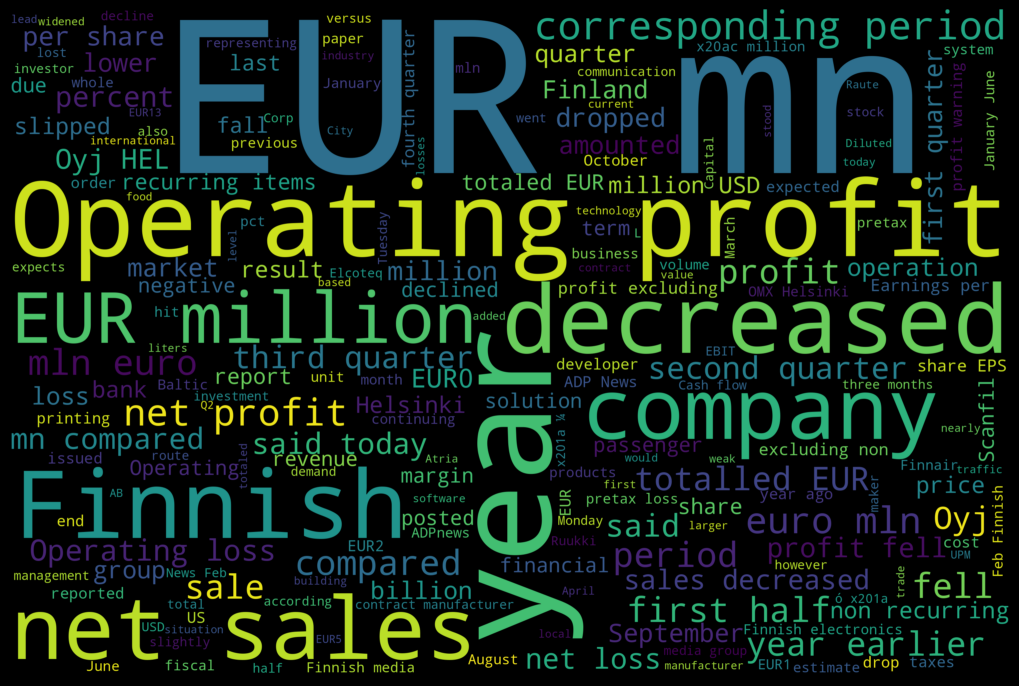

In [ ]:
plot_word_cloud(negative_data)

In [ ]:
positive_data = df_train[df_train['Label'] == 2]

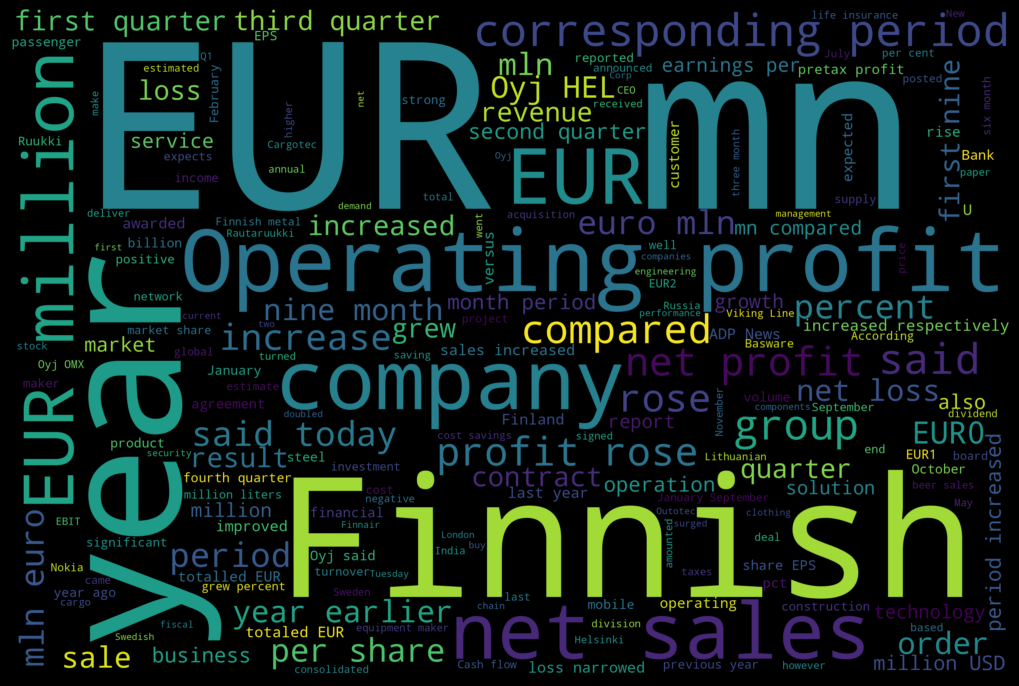

In [ ]:
plot_word_cloud(positive_data)

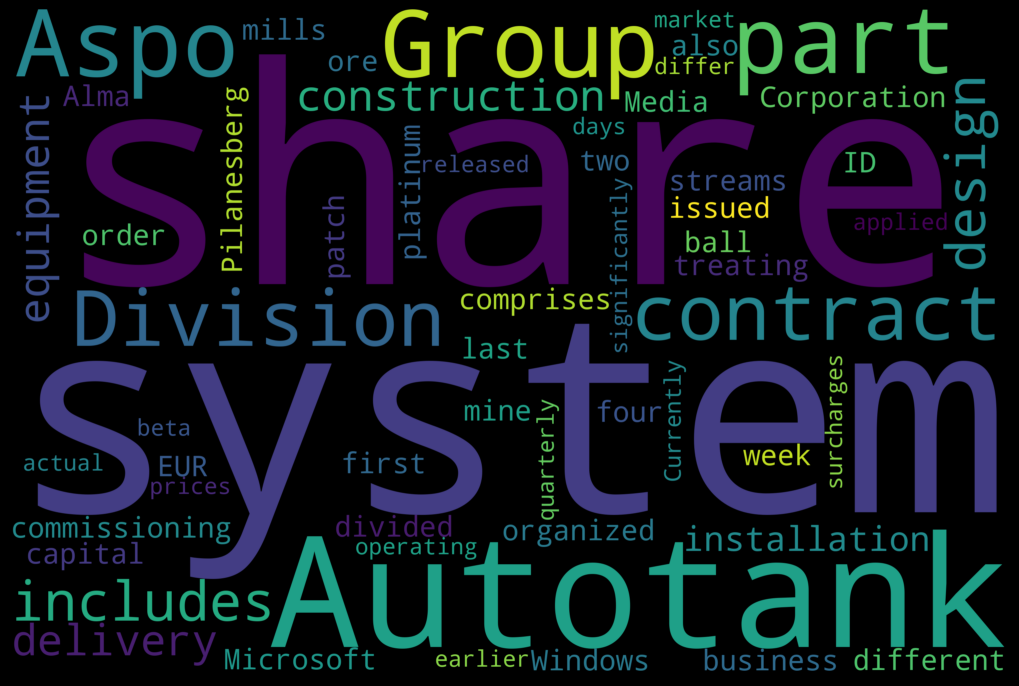

In [ ]:
neutral_data = df_train[df_train['Label'] == 1]
plot_word_cloud(neutral_data)

In [ ]:
print(PUNCTUATION)

!#$%&()*,-./:;<=>?@^_`{|}~


In [ ]:
sample_sentence = 'There, is-! a# lo?t of< pu>=nctuat-io!n he~re!'
print(sample_sentence)

There, is-! a# lo?t of< pu>=nctuat-io!n he~re!


In [ ]:
PUNCTUATION_RE = re.compile("[%s]" % PUNCTUATION)

In [ ]:
filtered_sample_sentence = PUNCTUATION_RE.sub("", sample_sentence)
print(filtered_sample_sentence)

There is a lot of punctuation here


In [ ]:
sentence = "Example Sentence\"" #@param {type:'string'}
tokens = word_tokenize(sentence)
tokens

['Example', 'Sentence', "''"]

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
word = "went" #@param {type:"string"}

pos_tag = nltk.pos_tag([word])[0][1][0].upper()
if pos_tag == 'J':
    pos_tag = 'a'

lemmatized_word = lemmatizer.lemmatize(word, pos=pos_tag.lower())
if lemmatized_word == word:
    lemmatized_word = lemmatizer.lemmatize(word, pos='v')

print(lemmatized_word)


go


In [ ]:
print(STOPWORD_SET)

{'we', 's', 'ours', 'which', 'after', "shouldn't", 'have', 'those', 're', 'or', 'too', 'any', 'ma', 'in', 'themselves', 'for', 'very', "didn't", 'its', 'so', 'did', 'yourself', 'into', 'her', 'his', 'all', 'ain', 'do', 't', "haven't", 'shan', 'under', 'isn', 'our', 'of', 'once', 'but', "doesn't", 'aren', 'such', 'm', 'should', 'me', 'it', 'because', 'then', "couldn't", 'most', 'while', 'when', 'their', "she's", 'only', 'both', 'them', 'was', 'above', 'out', 'to', 'didn', 'between', 'what', 'am', 'where', 'couldn', 'mightn', 'before', 'y', "don't", "weren't", 'needn', 'not', 'some', 'were', 'on', 'don', 'doing', "you'll", 'now', 'whom', "you'd", 'my', 'hadn', 'there', 've', 'does', 'your', 'same', 'up', 'being', 'that', 'myself', 'why', "shan't", 'itself', 'few', 'theirs', 'an', 'him', 'd', 'yours', "mightn't", "you've", 'she', 'a', 'wouldn', 'at', 'through', 'until', 'down', 'again', 'no', 'yourselves', 'below', 'each', "aren't", "wasn't", 'o', 'own', 'he', 'shouldn', 'who', 'having', 

In [ ]:
word = "stopword\"" #@param {type:"string"}
if not word: raise Exception('Please enter a word')
eng_stopwords = set(stopwords.words('english'))
if word[:-1].lower().strip() in eng_stopwords: print('Yes,\"{}'' is a stopword.'.format(word))
else: print('No,\"{}'' is NOT a stopword.'.format(word))



No,"stopword" is NOT a stopword.


In [ ]:
print('Sample Input:\t{}'.format(SAMPLE_SENTENCE))
print('Sample Output:\t{}'.format(SAMPLE_SOLUTION))

Sample Input:	I need to remove all these meaningless stopwords.
Sample Output:	['need', 'remove', 'meaningless', 'stopwords']


In [ ]:
def remove_stopwords(full_sentence):
  no_punctuation_sentence = re.sub("[^a-zA-Z]", " ", full_sentence)
  words = word_tokenize(no_punctuation_sentence)
  filtered_sentence = []
  for w in words:
      if w.lower() not in STOPWORD_SET:
          filtered_sentence.append(w)
  return filtered_sentence

In [ ]:
print(SAMPLE_SENTENCE)

I need to remove all these meaningless stopwords.


In [ ]:
remove_stopwords(SAMPLE_SENTENCE)

['need', 'remove', 'meaningless', 'stopwords']

In [ ]:
train_sentences, train_labels = preprocess_data(df_train)
for sentence in train_sentences[:3]:
    print(sentence)

['Autotank', 'Group', 'part', 'Aspo', 'Systems', 'Division']
['contract', 'includes', 'design', 'construction', 'delivery', 'equipment', 'installation', 'commissioning']
['Rapala', 'said', 'estimates', 'make', 'savings', 'mln', 'eur', 'year', 'centralising', 'French', 'operations', 'one', 'site']


In [ ]:
test_sentences, test_labels = preprocess_data(df_test)
for sentence in test_sentences[:3]:
    print(sentence)

['third', 'quarter', 'net', 'sales', 'increased', 'EUR', 'mn', 'operating', 'profit', 'EUR', 'mn']
['Foundries', 'division', 'reports', 'sales', 'increased', 'EUR', 'mn', 'EUR', 'mn', 'corresponding', 'period', 'sales', 'Machine', 'Shop', 'division', 'increased', 'EUR', 'mn', 'EUR', 'mn', 'corresponding', 'period']
['Financing', 'project', 'come', 'mainly', 'China']


In [ ]:
_1_ = '' #@param {type:"string"}
_2_ = '' #@param {type:"string"}
_3_ = '' #@param {type:"string"}

print('1: It is a simple baseline models that tells us how much room there is to improve.')
print('2: Model iteration is quick and easy.')
print('3: Logistic regression is interpretable. It is often extremely important that you are able to understand why a model is making specific predictions, and Logistic Regression gives us this ability.')

1: It is a simple baseline models that tells us how much room there is to improve.
2: Model iteration is quick and easy.
3: Logistic regression is interpretable. It is often extremely important that you are able to understand why a model is making specific predictions, and Logistic Regression gives us this ability.


In [ ]:
# List of sentences
all_sentences = ["Google AI made remarkable achievements in 2019.", "Google Stock was at its all time high"]

#Create instance of CountVectorizer() object
vectorizer = CountVectorizer()

`CountVectorizer`'s `.fit()` method learns about the text (its length, vocabulary, etc.).

In [ ]:
# Tokenizes the text and builds the vocabulary
vectorizer.fit(all_sentences)

CountVectorizer()

In [ ]:
print(vectorizer.vocabulary_)

{'google': 5, 'ai': 2, 'made': 9, 'remarkable': 10, 'achievements': 1, 'in': 7, '2019': 0, 'stock': 11, 'was': 13, 'at': 4, 'its': 8, 'all': 3, 'time': 12, 'high': 6}


`CountVectorizer`'s `.transform()` method turns the sentences into their Bag-of-Words vector representations.

In [ ]:
# Encode sentences as a vectors
bag_of_words_matrix = vectorizer.transform(all_sentences).toarray()

# Print vectors
print(bag_of_words_matrix)

[[1 1 1 0 0 1 0 1 0 1 1 0 0 0]
 [0 0 0 1 1 1 1 0 1 0 0 1 1 1]]


In [ ]:
print(bag_of_words_matrix.shape)

(2, 14)


In [ ]:
def train_model(train_sentences, train_labels):
  """
  param: train_sentences - list of pre-processed sentences to train on
  param: train_labels - list of labels (positive, neutral, negative) for each sentence in train_sentences
  return: the vectorizer, the Logistic Regression model
  """
  train_sentences = [" ".join(t) for t in train_sentences]
  train_labels = [l for l in train_labels]
  vectorizer = CountVectorizer()
  vectorizer.fit(train_sentences)
  train_vect = vectorizer.transform(train_sentences)
  #NOTE: Can also use train_vect = vectorizer.fit_transform(train_sentences)
  model = LogisticRegression()
  model.fit(train_vect, train_labels)
  return model, vectorizer

In [ ]:
model, train_vectorizer = train_model(train_sentences, train_labels)

In [ ]:
def predict(test_sentences, test_labels, vectorizer, model):
  """
  param: test_sentences - list of pre-processed sentences to test the model
  param: vectorizer - the CountVectorizer from the train_model function
  param: model - the Logistic Regression model from the train_model function
  return: preds - the predictions of the model based on test_sentences
  """
  test_sentences = [" ".join(t) for t in  test_sentences]
  test_vect = vectorizer.transform(test_sentences)
  preds = model.predict(test_vect)
  acc = metrics.accuracy_score(test_labels, preds)
  return preds, acc

In [ ]:
y_predictions, test_accuracy = predict(test_sentences, test_labels, train_vectorizer, model)
print('The model had an accuracy of {:.2%} on the test dataset'.format(test_accuracy))

The model had an accuracy of 84.58% on the test dataset


Plotting the Confusion Matrix


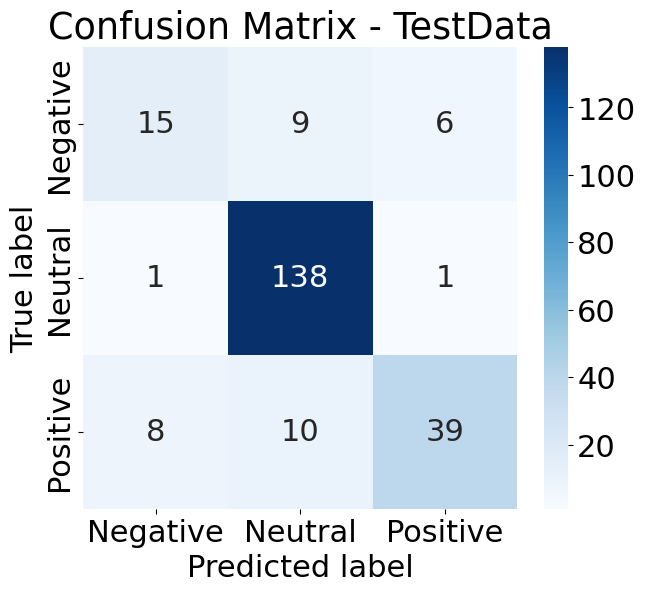

In [ ]:
plot_confusion_matrix(test_labels, y_predictions)

In [ ]:
#@title Section 2: Advanced NLP Model { display-mode: "form" }
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")
from torchtext.vocab import GloVe
import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
import numpy
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Keras-Preprocessing
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

from keras.preprocessing.text import Tokenizer
import string

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(7,6))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()


def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

PUNCTUATION = '!#$%&()*,-./:;<=>?@^_`{|}~'

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)

    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

def pad_sequences_train(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_train['Sentence'].values)
  X_train = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_train

def pad_sequences_test(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_test['Sentence'].values)
  X_test = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_test

def run_model(X_train, y_train, X_test, y_test, epochs=5, max_sequence_length=256, max_nb_words=1000, embedding_dim=300):
  if any(x is None for x in [X_train, y_train, X_test, y_test, epochs, max_sequence_length, max_nb_words, embedding_dim]):
    print('Replace the None values above with your new values before calling the run_model() function.')
    return None, None, None
  model = Sequential()
  model.add(Embedding(max_nb_words+1, embedding_dim, mask_zero=True, input_length=max_sequence_length))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(n_labels, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())
  history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  return model, history, test_accuracy


EMBEDDING_DIM = 300

plt.rcParams.update({'font.size': 22})

nltk.download('wordnet')

!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

print ("Train & Test Files are loaded")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


finance_test.csv.1  100%[===================>]  28.58K  --.-KB/s    in 0.002s  
finance_train.csv.1 100%[===================>] 252.53K  1.08MB/s    in 0.2s    
Train & Test Files are loaded


In [ ]:
df_train = get_finance_train()
df_test = get_finance_test()

In [ ]:
longest_sentence_index = np.argmax([len(x) for x in df_train['Sentence'].str.split(' ')])
longest_sentence = df_train.iloc[longest_sentence_index]['Sentence']
longest_sentence_length = len(longest_sentence.split(' '))

In [ ]:
df_train['Sentence'] = df_train['Sentence'].apply(clean_text)
df_test['Sentence'] = df_test['Sentence'].apply(clean_text)

In [ ]:
MAX_SEQUENCE_LENGTH = 256
MAX_NB_WORDS = 1000

In [ ]:
X_train = pad_sequences_train(df_train, df_test)

In [ ]:
X_test = pad_sequences_test(df_train, df_test)

In [ ]:
y_train = pd.get_dummies(df_train['Label']).values

In [ ]:
y_test = pd.get_dummies(df_test['Label']).values

In [ ]:
n_labels = 3
label_map = {0 : "negative",
             1 : "neutral",
             2 : "positive"}

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS+1, EMBEDDING_DIM, mask_zero=True, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(n_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 300)          300300    
                                                                 
 spatial_dropout1d (SpatialD  (None, 256, 300)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 461,003
Trainable params: 461,003
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 5
batch_size = 64

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
29/29 [==============================] - 76s 2s/step - loss: 0.9286 - accuracy: 0.6427 - val_loss: 0.6631 - val_accuracy: 0.7843
Epoch 2/5
29/29 [==============================] - 46s 2s/step - loss: 0.5594 - accuracy: 0.7774 - val_loss: 0.5908 - val_accuracy: 0.7990
Epoch 3/5
29/29 [==============================] - 50s 2s/step - loss: 0.3890 - accuracy: 0.8456 - val_loss: 0.5230 - val_accuracy: 0.8333
Epoch 4/5
29/29 [==============================] - 44s 2s/step - loss: 0.2661 - accuracy: 0.9094 - val_loss: 0.5766 - val_accuracy: 0.8235
Epoch 5/5
29/29 [==============================] - 42s 1s/step - loss: 0.1732 - accuracy: 0.9465 - val_loss: 0.5251 - val_accuracy: 0.8431


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

8/8 [==============================] - 1s 93ms/step - loss: 0.5197 - accuracy: 0.8634


In [ ]:
training_loss = history.history['loss']

In [ ]:
validation_loss = history.history['val_loss']

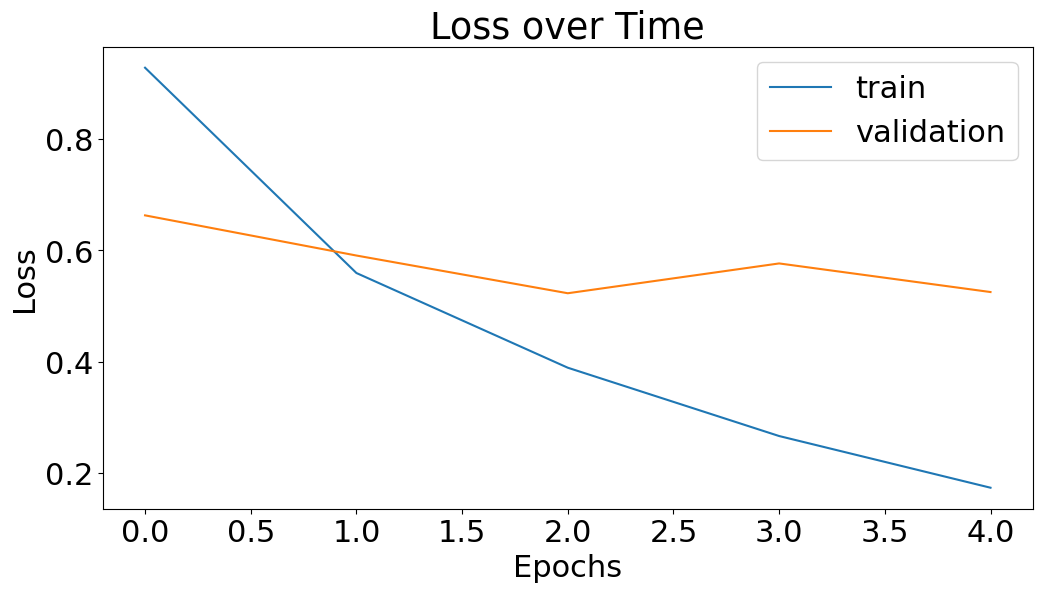

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(training_loss, label='train')
plt.plot(validation_loss, label='validation')

plt.legend()
plt.show()

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

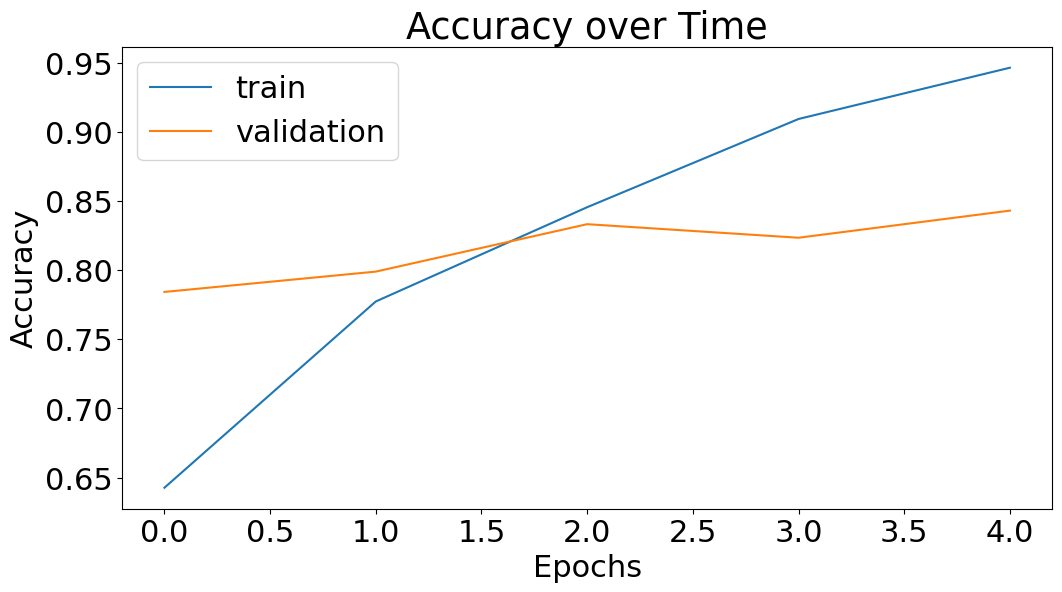

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title('Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(training_accuracy, label='train')
plt.plot(validation_accuracy, label='validation')

plt.legend()
plt.show()

In [ ]:
model, history, test_acc = run_model(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    epochs=6,
    max_nb_words=1500,
    embedding_dim=280
)
print('New test accuracy is {}'.format(test_acc))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 280)          420280    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 256, 280)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               152400    
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 572,983
Trainable params: 572,983
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/6
29/29 [==============================] - 66s 2s/step - loss: 0.9240 - accuracy: 0.6568 - val_loss: 

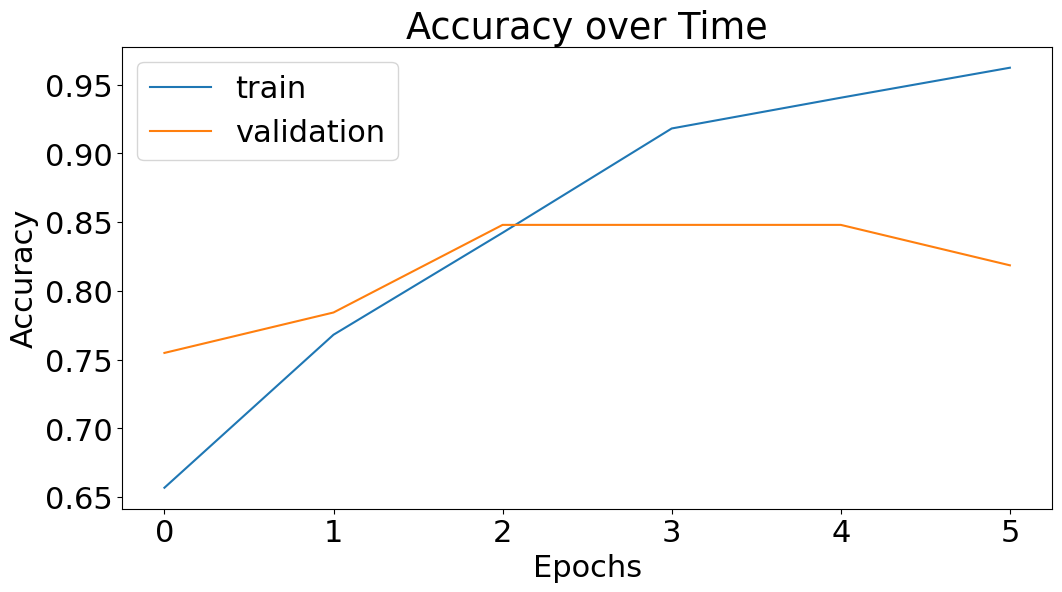

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

fig = plt.figure(figsize=(12,6))
plt.title('Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(training_accuracy, label='train')
plt.plot(validation_accuracy, label='validation')

plt.legend()
plt.show()

8/8 [==============================] - 1s 124ms/step
Plotting the Confusion Matrix


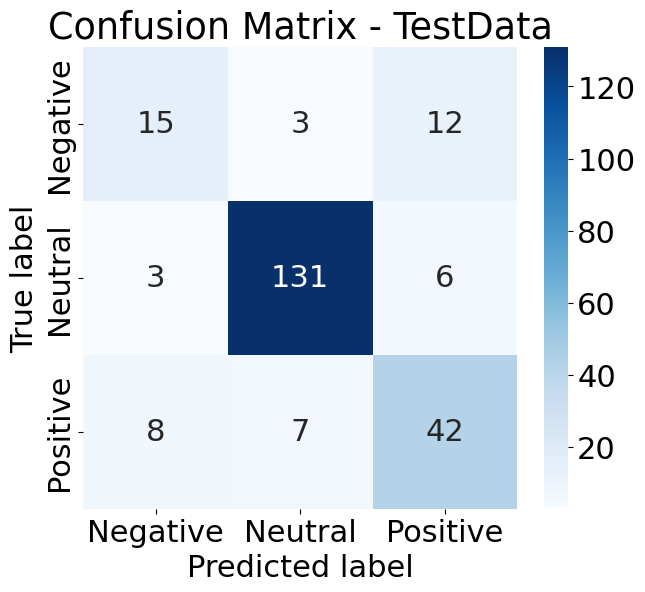

In [ ]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis = - 1)
y_true = y_test.argmax(axis = - 1)

plot_confusion_matrix(y_true, y_pred)

In [ ]:
#@title Section 3: Pretrained BERT Model { display-mode: "form" }
!pip install transformers
import os
import gdown
import torch
import numpy as np
import seaborn as sns
import transformers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences
from sklearn import metrics

from transformers import BertTokenizer
from transformers import get_linear_schedule_with_warmup
from transformers import BertForSequenceClassification, BertConfig
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import AdamW

%matplotlib inline


!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

print ("Train and Test Files Loaded as train.csv and test.csv")

LABEL_MAP = {0 : "negative", 1 : "neutral", 2 : "positive"}
NONE = 4 * [None]
RND_SEED=2020

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(14,12))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.2 MB/s eta 0:00:00
--2023-08-07 23:50:37--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 74.125.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29264 (29K) [application/vnd.ms-excel]
Saving to: ‘finance_test.csv.2’

finance_test.csv.2  100%[===================>]  28.58K  --.-KB/s    in 0s      

2023-08-07 23:50:38 (88.7 MB/s) - ‘finance_test.csv.2’ saved [29264/29264]

--202

In [ ]:
df_train = get_finance_train()
df_test = get_finance_test()

In [ ]:
sentences = df_train['Sentence'].values
labels = df_train['Label'].values

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case = True)

In [ ]:
print(tokenizer.vocab_size)

In [ ]:
original_sentence = sentences[0]
tokenized_sentence = tokenizer.tokenize(original_sentence)
print('Original Sentence: ', original_sentence)
print('Tokenized Sentence: ', tokenized_sentence)

Original Sentence:  Autotank Group is part of Aspo 's Systems Division .
Tokenized Sentence:  ['auto', '##tan', '##k', 'group', 'is', 'part', 'of', 'as', '##po', "'", 's', 'systems', 'division', '.']


In [ ]:
original_sentence = sentences[0]
tokenized_sentence = tokenizer.tokenize(original_sentence)
print('Tokenized Sentence: ', tokenized_sentence)
print('Mapped Indices Sentence: ', tokenizer.convert_tokens_to_ids(tokenized_sentence))

Tokenized Sentence:  ['auto', '##tan', '##k', 'group', 'is', 'part', 'of', 'as', '##po', "'", 's', 'systems', 'division', '.']
Mapped Indices Sentence:  [8285, 5794, 2243, 2177, 2003, 2112, 1997, 2004, 6873, 1005, 1055, 3001, 2407, 1012]


In [ ]:
sentences_with_special_tokens = []
for sentence in sentences:
  new_sentence = "[CLS] " + sentence + " [SEP]"
  sentences_with_special_tokens.append(new_sentence)
print(sentences_with_special_tokens[0])

[CLS] Autotank Group is part of Aspo 's Systems Division . [SEP]


In [ ]:
tokenized_texts = []
for sentence in sentences_with_special_tokens:
  tokenized_sentence = tokenizer.tokenize(sentence)
  tokenized_texts.append(tokenized_sentence)
print(tokenized_texts[0])

['[CLS]', 'auto', '##tan', '##k', 'group', 'is', 'part', 'of', 'as', '##po', "'", 's', 'systems', 'division', '.', '[SEP]']


In [ ]:
input_ids = []
for text in tokenized_texts:
  new_list = tokenizer.convert_tokens_to_ids(text)
  input_ids.append(new_list)
print(input_ids[0])

[101, 8285, 5794, 2243, 2177, 2003, 2112, 1997, 2004, 6873, 1005, 1055, 3001, 2407, 1012, 102]


In [ ]:
input_ids = pad_sequences(input_ids,
                          maxlen=128,
                          dtype="long",
                          truncating="post",
                          padding="post")
print(input_ids[0])

[ 101 8285 5794 2243 2177 2003 2112 1997 2004 6873 1005 1055 3001 2407
 1012  102    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
attention_masks = []
for sequence in input_ids:
  mask = [float(i > 0) for i in sequence]
  attention_masks.append(mask)
print (attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(input_ids,
                                                  labels,
                                                  test_size=0.15,
                                                  random_state=RND_SEED)

In [ ]:
train_masks, validation_masks, _, _ = train_test_split(attention_masks,
                                                       input_ids,
                                                       test_size=0.15,
                                                       random_state=RND_SEED)

In [ ]:
train_inputs = torch.tensor(np.array(X_train));
validation_inputs = torch.tensor(np.array(X_val));
train_masks = torch.tensor(np.array(train_masks));
validation_masks = torch.tensor(np.array(validation_masks));
train_labels = torch.tensor(np.array(y_train));
validation_labels = torch.tensor(np.array(y_val));

batch_size = 32
train_data = TensorDataset(train_inputs, train_masks, train_labels);
train_sampler = RandomSampler(train_data);
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size);
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels);
validation_sampler = SequentialSampler(validation_data);
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size);

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 3,
    output_attentions = False,
    output_hidden_states = False,
);

model.cuda();

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


'Tesla T4'

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                )
epochs = 4

In [ ]:
#@title Training the Model
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

training_loss = []
validation_loss = []
training_stats = []
for epoch_i in range(0, epochs):
    print('Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training the model')
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        if step % 20 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}. '.format(step, len(train_dataloader)))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)
        loss = outputs[0]
        logits = outputs[1]
        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)

    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("Evaluating on Validation Set")
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    for batch in validation_dataloader:


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)


        with torch.no_grad():

            outputs = model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = outputs[0]
            logits = outputs[1]

        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)


    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("Validation Accuracy: {0:.2f}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader)



    print("Validation Loss: {0:.2f}".format(avg_val_loss))

    training_loss.append(avg_train_loss)
    validation_loss.append(avg_val_loss)


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy

        }
    )

print("Training complete!")

Epoch 1 / 4 ========
Training the model
  Batch    20  of     55. 
  Batch    40  of     55. 
  Average training loss: 0.65
Evaluating on Validation Set
Validation Accuracy: 0.88
Validation Loss: 0.37
Epoch 2 / 4 ========
Training the model
  Batch    20  of     55. 
  Batch    40  of     55. 
  Average training loss: 0.22
Evaluating on Validation Set
Validation Accuracy: 0.95
Validation Loss: 0.16
Epoch 3 / 4 ========
Training the model
  Batch    20  of     55. 
  Batch    40  of     55. 
  Average training loss: 0.08
Evaluating on Validation Set
Validation Accuracy: 0.95
Validation Loss: 0.14
Epoch 4 / 4 ========
Training the model
  Batch    20  of     55. 
  Batch    40  of     55. 
  Average training loss: 0.04
Evaluating on Validation Set
Validation Accuracy: 0.96
Validation Loss: 0.13
Training complete!


In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(training_loss, label='train')
plt.plot(validation_loss, label='validation')

plt.legend()
plt.show()

In [ ]:
test_sentences = df_test.Sentence.values
test_labels = df_test.Label.values

In [ ]:
test_input_ids, test_attention_masks = [], []
test_sentences = ["[CLS] " + sentence + " [SEP]" for sentence in test_sentences]
tokenized_test_sentences = [tokenizer.tokenize(sent) for sent in test_sentences]
test_input_ids = [tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_test_sentences]
test_input_ids = pad_sequences(test_input_ids,
                               maxlen=128,
                               dtype="long",
                               truncating="post",
                               padding="post")
for sequence in test_input_ids:
  mask = [float(i>0) for i in sequence]
  test_attention_masks.append(mask)

In [ ]:
batch_size = 32
test_input_ids = torch.tensor(test_input_ids)
test_attention_masks = torch.tensor(test_attention_masks)
test_labels = torch.tensor(test_labels)
prediction_data = TensorDataset(test_input_ids, test_attention_masks, test_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Predicting labels for 227 test sentences...
Test Accuracy: 96.48%
Plotting the Confusion Matrix


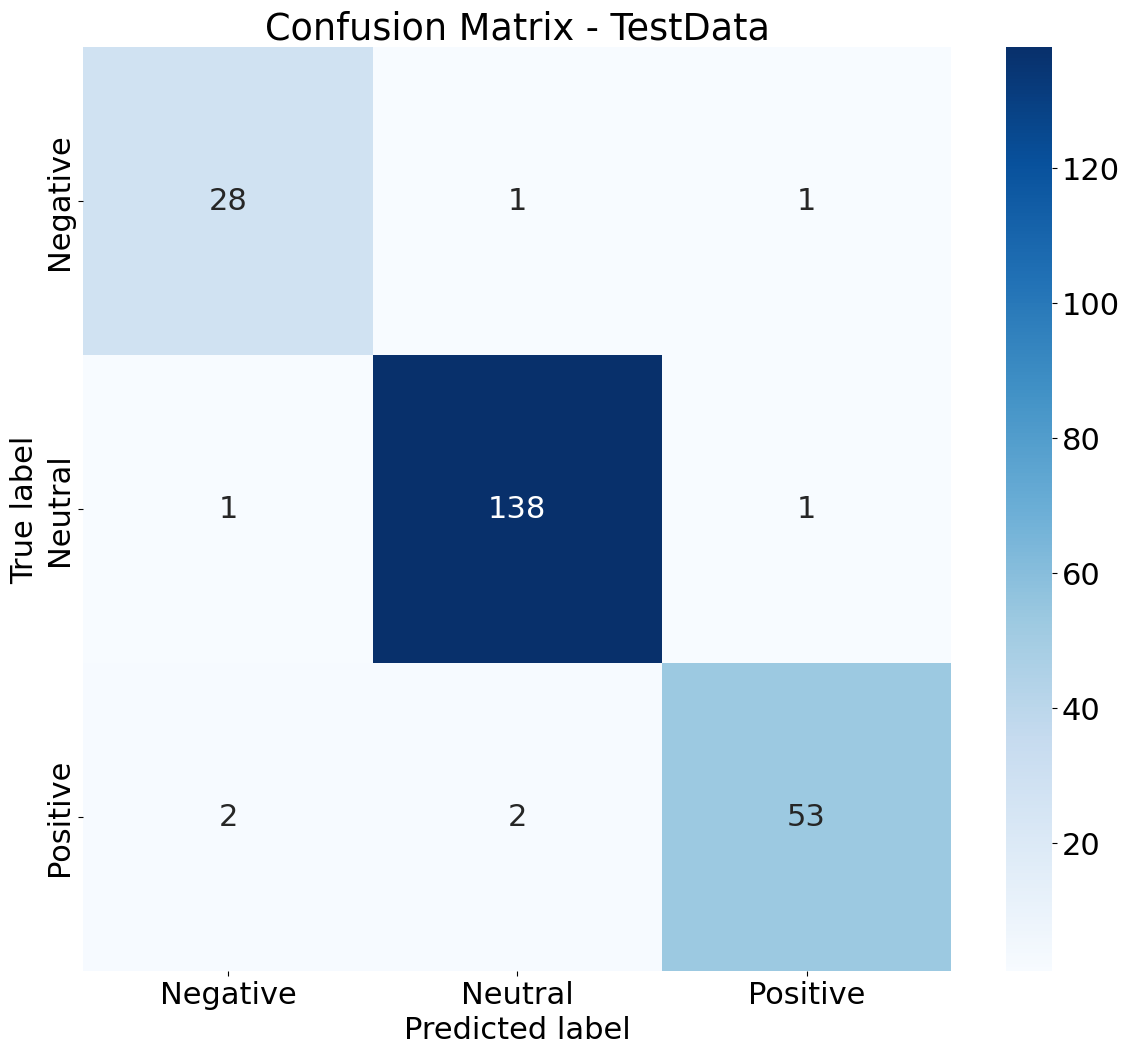

In [ ]:
#@title Evaluate Test Set Accuracy

print('Predicting labels for {:,} test sentences...'.format(len(test_input_ids)))

model.eval()

predictions , true_labels = [], []

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  predictions.append(logits)
  true_labels.append(label_ids)

y_logits, y_true, y_preds = [], [], []

for chunk in predictions:
  for logits in chunk:
    y_logits.append(logits)

for chunk in true_labels:
  for label in chunk:
    y_true.append(label)

for logits in y_logits:
  y_preds.append(np.argmax(logits))

print ('Test Accuracy: {:.2%}'.format(metrics.accuracy_score(y_preds,y_true)))
plot_confusion_matrix(y_true,y_preds)

Results for Basic, Advanced, and BERT Models

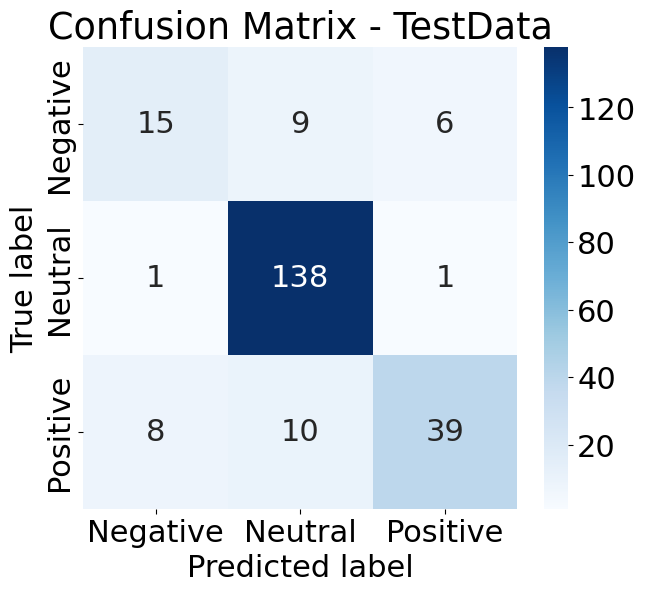
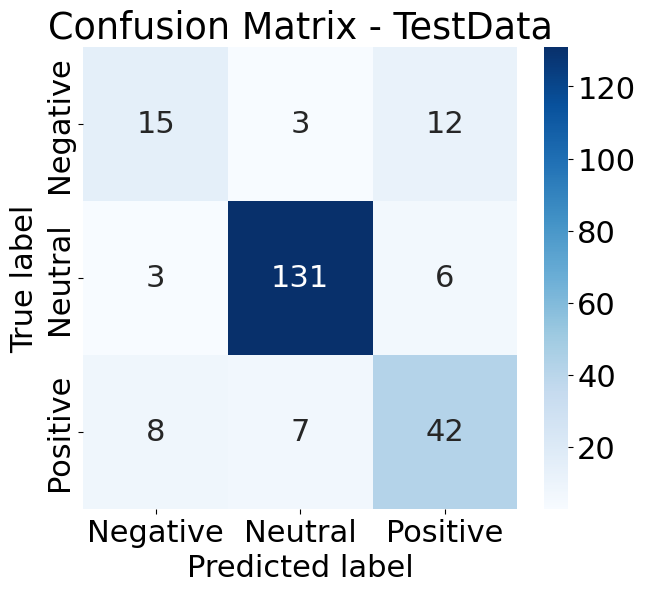
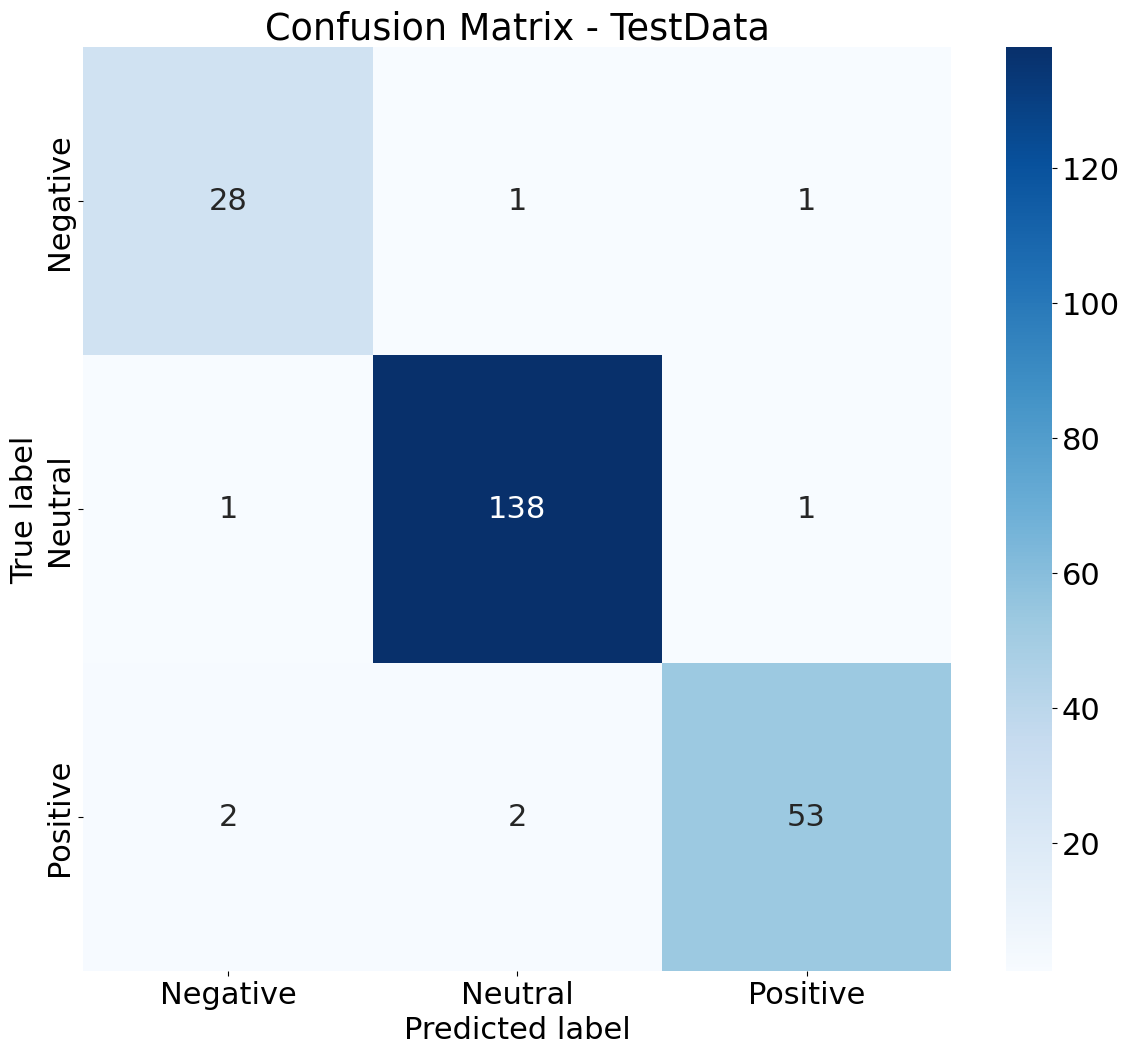